In [290]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# lecture des données et mise en forme

df = pd.read_csv('BTC-USD.csv', encoding='utf-8',index_col='Date',parse_dates=True)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Evolution du prix du BTC sur le temps

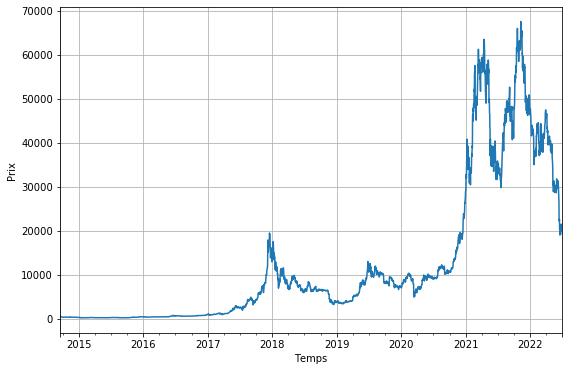

In [291]:
from matplotlib.pyplot import xlabel, ylabel


df['Close'].plot(figsize=(9,6))
xlabel('Temps')
ylabel('Prix')
plt.grid()

Corrélation entre les valeurs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999528,0.999112,0.998811,0.998811,0.724008
High,0.999528,1.000000,0.999043,0.999476,0.999476,0.727865
Low,0.999112,0.999043,1.000000,0.999389,0.999389,0.715739
Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Adj Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Volume,0.724008,0.727865,0.715739,0.722695,0.722695,1.000000


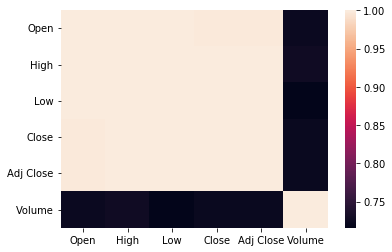

In [292]:
sns.heatmap(df.corr()) 
df.corr()

In [293]:
#  definition des colonnes features et target 

close = df['Close']
volume = df['Volume']

features = volume
target = close
 
df = df[['Close','Volume']]
df.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [294]:
# regression linéaire simple 
from sklearn import linear_model

x=features.values.reshape(-1,1)
y=target
modele = linear_model.LinearRegression()
modele.fit(x,y)

print(modele.score(x,y))
print("coeff 1 = ", modele.coef_)

52.228765305150205
coeff 1 =  [6.01590305e-07]


Source et collecte des données : https://finance.yahoo.com/quote/BTC-USD/history/

Prix journalier du BTC du 17/09/2014 au 01/07/2022 

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


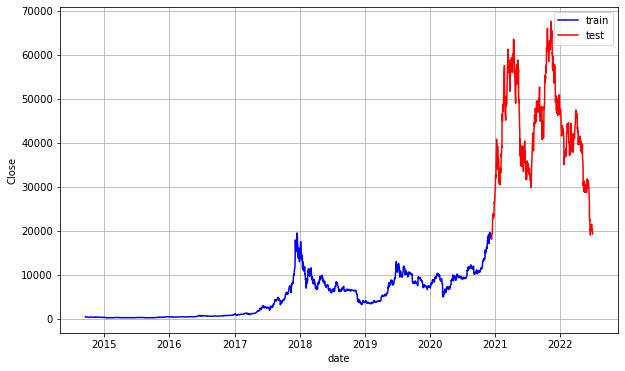

In [295]:
# Train test Split 

to_row = int(len(df)*0.8)

target_train_data = close[0:to_row]
target_test_data = close[to_row:] 

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(target_train_data,'blue',label='train')
plt.plot(target_test_data,"red",label='test')

plt.legend()






In [316]:
#test de stationnarité 

from statsmodels.tsa.stattools import adfuller

adfuller(target_train_data["2017-08":"2020-12-31"].diff(1)[1:])

# on est au dessus de 5% = hypothese non validé donc 

(-6.562915321321995,
 8.294822476383461e-09,
 19,
 1206,
 {'1%': -3.435783891669927,
  '5%': -2.863939534252909,
  '10%': -2.56804755322338},
 17810.507699433205)

In [314]:
from statsmodels.tsa.stattools import acf,pacf

n_test_obser = len(target_test_data)

# Entrainement du modele 

model = ARIMA(target_train_data["2017-08":"2020-12-31"], order = (1,1,1))
res = model.fit()



prediction = res.predict(start="2021-01",end="2021-01-30")



/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


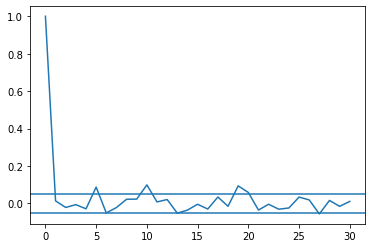

In [306]:
from pandas import DataFrame
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt


# df = DataFrame(np.log(target_train_data["2019-08-01":"2019-12-31"])).diff(1)[1:]
# df.head()


df = DataFrame(target_train_data["2017-08":"2020-12-31"])


plt.plot(pacf(df['Close'].diff(1)[1:]))
plt.axhline(0.05)
plt.axhline(-0.05)
# plt.axvline(1)

# pacf = 1
# acf = 1




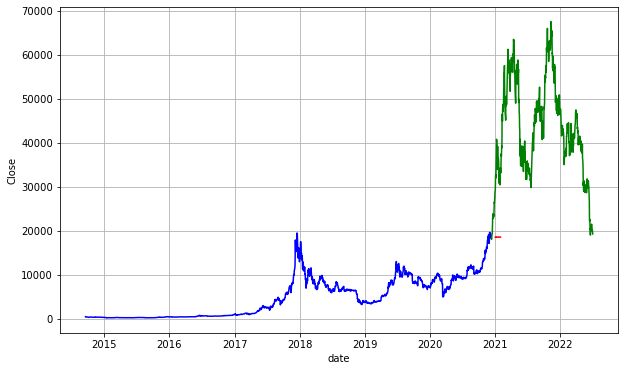

In [312]:
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(target_train_data,'blue',label='train')
plt.plot(target_test_data,"green",label='test')
plt.plot(prediction,"red",label='Prediction')




In [313]:
prediction

2021-01-01    18547.375270
2021-01-02    18542.404402
2021-01-03    18591.385616
2021-01-04    18557.105380
2021-01-05    18554.871579
2021-01-06    18543.450609
2021-01-07    18552.872082
2021-01-08    18585.005350
2021-01-09    18554.881715
2021-01-10    18555.798348
2021-01-11    18542.523739
2021-01-12    18560.671232
2021-01-13    18578.355999
2021-01-14    18554.655489
2021-01-15    18555.116801
2021-01-16    18543.918125
2021-01-17    18565.656090
2021-01-18    18572.500390
2021-01-19    18555.232288
2021-01-20    18553.798885
2021-01-21    18546.749322
2021-01-22    18568.194848
2021-01-23    18567.884473
2021-01-24    18555.881020
2021-01-25    18552.556310
2021-01-26    18550.181698
2021-01-27    18568.890676
2021-01-28    18564.537525
2021-01-29    18556.260755
2021-01-30    18551.797873
Freq: D, Name: predicted_mean, dtype: float64